In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from taigapy import TaigaClient
tc = TaigaClient()
public_19Q4_proteincoding_tpm = tc.get(name='depmap-rnaseq-expression-data-ccd0', version=16, file='public_19Q4_proteincoding_tpm')



import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from statannot import add_stat_annotation

anot = pd.read_csv('aneuploidy_data_compact.csv',index_col=0)

anot_CCLE = anot.copy()
anot_CCLE.index = anot_CCLE.loc[:,'CCLE_ID']

from cds import plotting

my_pal = {"Diploid": "C0", "Aneuploid": "firebrick"}
my_order = order=['Diploid','Aneuploid']

from taigapy import TaigaClient
tc = TaigaClient()

gene_effect_rnai_achilles = tc.get(name='demeter2-achilles-5386', version=13, file='gene_effect')
gene_effect_rnai_drive = tc.get(name='demeter2-drive-0591', version=12, file='gene_effect')
gene_effect_crispr_achilles = tc.get(name='avana-public-tentative-19q4-c2df', version=4, file='gene_effect')



In [49]:
ess = tc.get(name='avana-public-tentative-19q4-c2df', version=4, file='essential_genes').values[:,0]
com_ess = tc.get(name='avana-public-tentative-19q4-c2df', version=4, file='pan_dependent_genes').values[:,0]

comm_ess_drive = tc.get(name='demeter2-drive-0591', version=12, file='pan_dependent_genes').values[:,0]


pan_dependent_genes_rnai_achilles = tc.get(name='demeter2-achilles-5386', version=13, file='pan_dependent_genes').values[:,0]


In [50]:
look_ats = set(set(com_ess) & set(gene_effect_rnai_drive.columns)) - set(comm_ess_drive) & set(pan_dependent_genes_rnai_achilles)


In [51]:
gene_effect_rnai_drive.loc[:,look_ats].median().sort_values().iloc[-10:].index

Index(['PREB (10113)', 'WDR33 (55339)', 'WDR18 (57418)', 'BMS1 (9790)',
       'PAXBP1 (94104)', 'CD3EAP (10849)', 'TIMM10 (26519)', 'DDX19A (55308)',
       'SRRM2 (23524)', 'RANGAP1 (5905)'],
      dtype='object')

/Users/mkazachk/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  app.launch_new_instance()
/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with lab

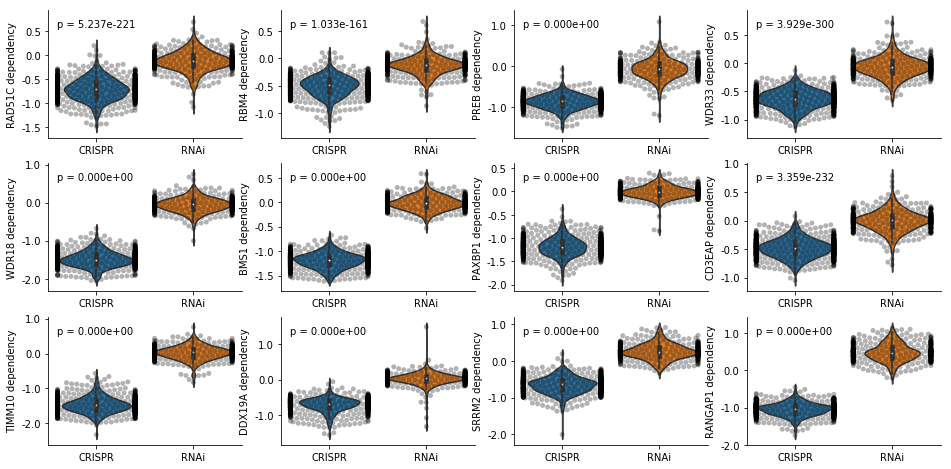

In [52]:
from scipy import stats
fig,ax = plt.subplots(3,4,figsize=(16,8))
from matplotlib.ticker import FormatStrFormatter

i=0
j=0

for gene in gene_effect_rnai_drive.loc[:,look_ats].median().sort_values().iloc[-12:].index:


    temp = pd.DataFrame(gene_effect_crispr_achilles.loc[:,gene])

    temp['crispr'] = 'CRISPR'


    temp = pd.concat([temp,pd.DataFrame(gene_effect_rnai_drive.loc[:,gene])])

    temp.loc[gene_effect_rnai_drive.loc[:,gene].index,'crispr'] = 'RNAi'


    sns.violinplot(data=temp,y=gene,x='crispr',ax=ax[i,j])
    sns.swarmplot(data=temp,y=gene,x='crispr',alpha=.3,color='black',ax=ax[i,j])

    plotting.simpleaxis(ax[i,j])

    ax[i,j].set_ylabel(gene.split(' ')[0] + ' dependency')
    ax[i,j].set_xlabel('')
    
    ax[i,j].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    
    
    tt,p_val = stats.ttest_ind(temp[temp.loc[:,'crispr'] == 'CRISPR'].iloc[:,0].dropna(),temp[temp.loc[:,'crispr'] == 'RNAi'].iloc[:,0].dropna())
    ax[i,j].legend(title='p = '+ ("{:.3e}".format(p_val)),frameon=False)
    
    
    j+=1
    if j ==4:
        i+=1
        j=0
    
    #plt.savefig(gene+'.png')
    #plt.figure()
plt.savefig('crispr_vs_rnai_with_pvalues.pdf')

In [54]:
print(p_val)

0.0


In [18]:
temp

,BRD4,crispr
ACH-000004,-0.724605,CRISPR
ACH-000005,-0.992587,CRISPR
ACH-000007,-1.143846,CRISPR
ACH-000009,-1.390527,CRISPR
ACH-000011,-1.098091,CRISPR
...,...,...
WM793_SKIN,-0.859025,RNAi
WM88_SKIN,NaN,RNAi
WSUDLCL2_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,-0.720664,RNAi
YD38_UPPER_AERODIGESTIVE_TRACT,-0.819106,RNAi


In [43]:
gene_effect_rnai_drive.columns = gene_effect_rnai_drive.columns.str.split(' ').str[0]
gene_effect_crispr_achilles.columns = gene_effect_crispr_achilles.columns.str.split(' ').str[0]

/Users/mkazachk/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  del sys.path[0]
/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


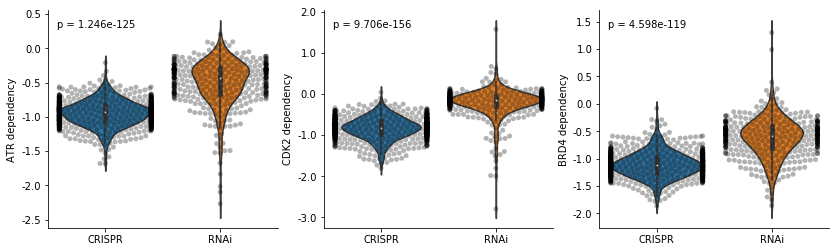

In [47]:
fig,axx = plt.subplots(1,3,figsize=(14,4))

i=0

for gene in ['ATR','CDK2','BRD4']:


    temp = pd.DataFrame(gene_effect_crispr_achilles.loc[:,gene])

    temp['crispr'] = 'CRISPR'


    temp = pd.concat([temp,pd.DataFrame(gene_effect_rnai_drive.loc[:,gene])])

    temp.loc[gene_effect_rnai_drive.loc[:,gene].index,'crispr'] = 'RNAi'


    sns.violinplot(data=temp,y=gene,x='crispr',ax=axx[i])
    sns.swarmplot(data=temp,y=gene,x='crispr',alpha=.3,color='black',ax=axx[i])

    plotting.simpleaxis(axx[i])

    axx[i].set_ylabel(gene.split(' ')[0] + ' dependency')
    axx[i].set_xlabel('')
    
    axx[i].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    
    tt,p_val = stats.ttest_ind(temp[temp.loc[:,'crispr'] == 'CRISPR'].iloc[:,0].dropna(),temp[temp.loc[:,'crispr'] == 'RNAi'].iloc[:,0].dropna())
    axx[i].legend(title='p = '+ ("{:.3e}".format(p_val)),frameon=False)
    
    
    i+=1
    
plt.savefig('3_genes_revision_with_pvalues.pdf')